In [ ]:
import pandas as pd
df = pd.read_csv("/content/netflix_titles_2021.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# prompt: remove outliers

# Remove outliers (example using IQR for numerical columns)
numerical_cols = df.select_dtypes(include=['number'])
for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Shape after removing outliers: {df.shape}")

Shape after removing outliers: (8088, 12)


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2557
cast,806
country,803
date_added,8
release_year,0
rating,4
duration,3


## Uni Var **Analysis**

In [ ]:
df['type']

,type
0,Movie
1,TV Show
2,TV Show
3,TV Show
4,TV Show
...,...
8802,Movie
8803,TV Show
8804,Movie
8805,Movie


In [ ]:
count =df['type'].value_counts()
percentage = df['type'].value_counts(normalize=True) * 100
Freq_table=pd.DataFrame({'Count': count, 'Percentage': percentage})
Freq_table

,Count,Percentage
type,,
Movie,5487,67.841246
TV Show,2601,32.158754


<Axes: xlabel='type'>

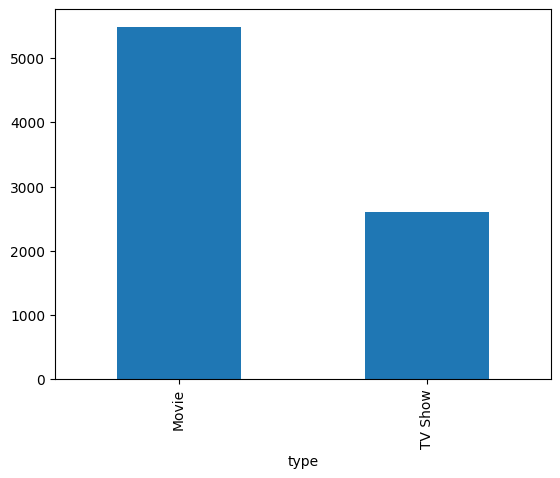

In [ ]:

count.plot(kind='bar')

In [ ]:
df['country']

,country
0,United States
1,South Africa
2,NaN
3,NaN
4,India
...,...
8802,United States
8803,NaN
8804,United States
8805,United States


In [ ]:
country_count =df['country'].value_counts()
country_percent = df['country'].value_counts(normalize=True) * 100
country_freq_table=pd.DataFrame({'Count': country_count, 'Percentage': country_percent})
country_freq_table

,Count,Percentage
country,,
United States,2494,34.234729
India,855,11.736445
United Kingdom,397,5.449554
Japan,227,3.115992
South Korea,199,2.731640
...,...,...
"Mauritius, South Africa",1,0.013727
"France, Japan",1,0.013727
"Argentina, Uruguay, Serbia",1,0.013727


In [ ]:
country_freq_table.tail()

,Count,Percentage
country,,
"Mauritius, South Africa",1,0.013727
"France, Japan",1,0.013727
"Argentina, Uruguay, Serbia",1,0.013727
"South Korea, Canada, United States, China",1,0.013727
"United Arab Emirates, Jordan",1,0.013727


# **Released Year**

In [ ]:
year_counts =df['release_year'].value_counts()
year_percentage =df['release_year'].value_counts(normalize=True)*100
year_freq_table=pd.DataFrame({'Count':year_counts, 'percentage':year_percentage})
year_freq_table.head(10)


,Count,percentage
release_year,,
2018,1147,14.181503
2017,1032,12.759644
2019,1030,12.734916
2020,953,11.782888
2016,902,11.152324
2021,592,7.319486
2015,560,6.923838
2014,352,4.352127
2013,288,3.560831


<Axes: xlabel='release_year'>

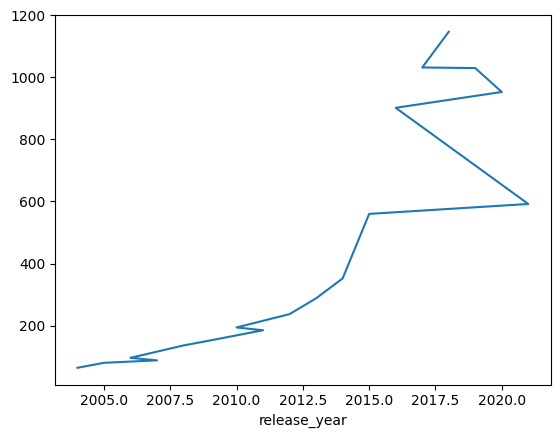

In [ ]:
year_counts.plot(kind='line')


# **Director Analysis**

In [ ]:
moviesdf=df[df['type']=='Movie']
Tvshowdf=df[df['type'] == 'TV Show']
director_count =moviesdf['director'].value_counts().head(10)
print(director_count)
tvshow_count= Tvshowdf['director'].value_counts().head(10)
print(tvshow_count)



director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Don Michael Paul          10
Hakan Algül                8
Lance Bangs                8
Name: count, dtype: int64
director
Rob Seidenglanz                         2
Hsu Fu-chun                             2
Iginio Straffi                          2
Shin Won-ho                             2
Alastair Fothergill                     2
Stan Lathan                             2
Julia Willoughby Nason, Jenner Furst    1
Thomas Astruc                           1
Elías León                              1
Diego Enrique Osorno                    1
Name: count, dtype: int64


# Cast **Analysis**

<Axes: xlabel='cast'>

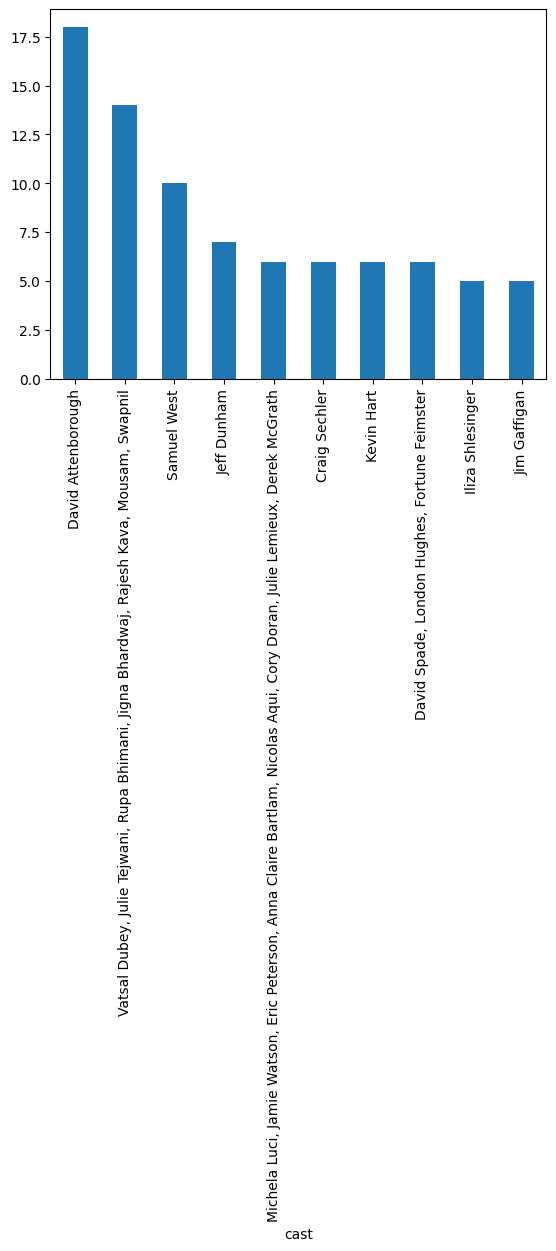

In [ ]:
df['cast'].value_counts().nlargest(10).plot(kind='bar')

# Rating **Analysis**

In [ ]:
df['rating']

,rating
0,PG-13
1,TV-MA
2,TV-MA
3,TV-MA
4,TV-MA
...,...
8802,R
8803,TV-Y7
8804,R
8805,PG


In [ ]:
rating_count= df['rating'].value_counts()
rating_percentage =df['rating'].value_counts(normalize=True)*100
rating_frq_table=pd.DataFrame({'Count':rating_count,'Percentage':rating_percentage})
rating_frq_table

,Count,Percentage
rating,,
TV-MA,3125,38.656606
TV-14,1986,24.567046
TV-PG,797,9.858981
R,638,7.892133
PG-13,379,4.688273
TV-Y7,318,3.933696
TV-Y,304,3.760515
PG,222,2.746165
TV-G,207,2.560614


<Axes: xlabel='rating'>

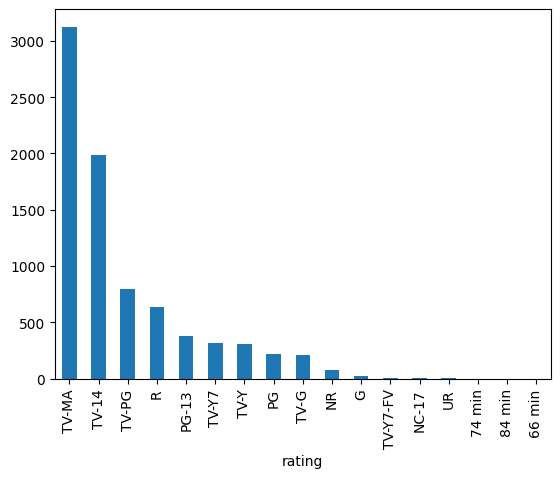

In [ ]:
rating_count.plot(kind='bar')

# Duration **Analysis**

In [ ]:
duration_counts=df['duration'].value_counts()
duration_percentage=df['duration'].value_counts(normalize=True)*100
duration_freq_table=pd.DataFrame({'Count':duration_counts,'Percentage':duration_percentage})
duration_freq_table

,Count,Percentage
duration,,
1 Season,1751,21.657390
2 Seasons,418,5.170068
3 Seasons,198,2.448980
90 min,142,1.756339
97 min,137,1.694496
...,...,...
5 min,1,0.012369
208 min,1,0.012369
181 min,1,0.012369


In [ ]:
moviesdf['duration'].value_counts()


,count
duration,
90 min,142
91 min,137
97 min,137
93 min,131
94 min,125
...,...
186 min,1
16 min,1
208 min,1


In [ ]:
Tvshowdf['duration'].value_counts()


,count
duration,
1 Season,1751
2 Seasons,418
3 Seasons,198
4 Seasons,90
5 Seasons,61
6 Seasons,29
7 Seasons,18
8 Seasons,16
9 Seasons,8


# ListenIn **Analysis**




In [ ]:
ListenIn_count=moviesdf['listed_in'].value_counts()
ListedIn_percentage=moviesdf['listed_in'].value_counts(normalize=True)*100
ListedIn_freq_table= pd.DataFrame({'Count':ListenIn_count,'Percentage':ListedIn_percentage})
ListedIn_freq_table

,Count,Percentage
listed_in,,
Documentaries,352,6.415163
"Dramas, International Movies",341,6.214689
Stand-Up Comedy,317,5.777292
"Comedies, Dramas, International Movies",249,4.537999
"Dramas, Independent Movies, International Movies",239,4.355750
...,...,...
"Dramas, Faith & Spirituality, Independent Movies",1,0.018225
"Comedies, Independent Movies, Music & Musicals",1,0.018225
"Comedies, Cult Movies, Independent Movies",1,0.018225


In [ ]:
ListenIn_count=Tvshowdf['listed_in'].value_counts()
ListedIn_percentage=Tvshowdf['listed_in'].value_counts(normalize=True)*100
ListedIn_freq_table= pd.DataFrame({'Count':ListenIn_count,'Percentage':ListedIn_percentage})
ListedIn_freq_table

,Count,Percentage
listed_in,,
Kids' TV,207,7.958478
"International TV Shows, TV Dramas",121,4.652057
"Crime TV Shows, International TV Shows, TV Dramas",110,4.229143
"Kids' TV, TV Comedies",96,3.690888
Reality TV,94,3.613995
...,...,...
"TV Action & Adventure, TV Comedies, TV Dramas",1,0.038447
"Crime TV Shows, International TV Shows, Reality TV",1,0.038447
"Docuseries, Reality TV, Teen TV Shows",1,0.038447
